Cleaning data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "/content/drive/MyDrive/Final Project/sales.csv"


sales = pd.read_csv(file, encoding='latin-1')

# Dropping full blank rows
sales = sales.dropna(how='all')

# Dropping unneeded columns
sales.drop(['ADDRESSLINE2', 'CITY', 'TERRITORY', 'POSTALCODE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME','STATE'], axis=1, inplace=True)


Analysis

In [ ]:
## Creating a new column and segmenting high-value from low-value customers
## Where high-value means sales above $2000 and low-value means sales below $2000

sales['Customer_Segment'] = np.where(sales['SALES'] > 2000, 'High-Value', 'Low-Value')

## Calculating the frequency of sales per ordernumber
freq = sales.groupby('ORDERNUMBER')['ORDERDATE'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['ORDERNUMBER', 'frequency']

sales = pd.merge(sales, df_freq, on='ORDERNUMBER')

In [ ]:
print(sales[['ORDERNUMBER', 'frequency']])

      ORDERNUMBER  frequency
0           10107          8
1           10107          8
2           10107          8
3           10107          8
4           10107          8
...           ...        ...
2818        10352          4
2819        10352          4
2820        10352          4
2821        10118          1
2822        10294          1

[2823 rows x 2 columns]


In [ ]:
# Loading the sales data in a pandas dataframe
df = pd.DataFrame(sales)

# Calculating Customer Value (CV) for each order
df['CV'] = df['ORDERLINENUMBER'] * df['PRICEEACH']

# Aggregating CV at the customer level
customer_cv = df.groupby('CUSTOMERNAME')['CV'].sum()

# making CV as a column in the original DataFrame
df = df.merge(customer_cv, on='CUSTOMERNAME', suffixes=('', '_total'))

# Calculating total number of customers
total_customers = len(df['CUSTOMERNAME'].unique())

# Calculating Average Purchase Frequency
average_frequency = df['frequency'].mean()

# Calculating CLTV (using the aggregated customer CV)
df['CLTV'] = df['CV_total'] * average_frequency

# Print results 'showing only relevant columns'
print(df[['CUSTOMERNAME', 'CV_total', 'CLTV']])


                 CUSTOMERNAME  CV_total           CLTV
0           Land of Toys Inc.  29095.42  347176.486964
1           Land of Toys Inc.  29095.42  347176.486964
2           Land of Toys Inc.  29095.42  347176.486964
3           Land of Toys Inc.  29095.42  347176.486964
4           Land of Toys Inc.  29095.42  347176.486964
...                       ...       ...            ...
2818  Auto-Moto Classics Inc.   1371.21   16361.745962
2819  Auto-Moto Classics Inc.   1371.21   16361.745962
2820  Auto-Moto Classics Inc.   1371.21   16361.745962
2821  Auto-Moto Classics Inc.   1371.21   16361.745962
2822  Auto-Moto Classics Inc.   1371.21   16361.745962

[2823 rows x 3 columns]


In [ ]:
# Analyzing Top 10 Products

def top_products(sales, n=10):
  # Grouping data by product and calculating total sales
  product_sales = sales.groupby('PRODUCTCODE')['SALES'].sum()

  # Sorting products by sales in descending order
  top_products = product_sales.sort_values(ascending=False).head(n)

  # Create a DataFrame showing top products and their sales
  top_products_df = pd.DataFrame({'Product Code': top_products.index, 'Total Sales': top_products.values})

  return top_products_df

# Loading the data in Pandas Dataframe named 'data'
top_selling_products = top_products(sales.copy(), n=11)

# Print the DataFrame
print(top_selling_products)

   Product Code  Total Sales
0      S18_3232    288245.42
1      S10_1949    191073.03
2      S10_4698    170401.07
3      S12_1108    168585.32
4      S18_2238    154623.95
5      S12_3891    145332.04
6      S24_3856    140626.90
7      S12_2823    140006.16
8      S18_1662    139421.97
9      S12_1099    137177.01
10     S12_1666    136692.72


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  COUNTRY           2823 non-null   object 


Visualizations

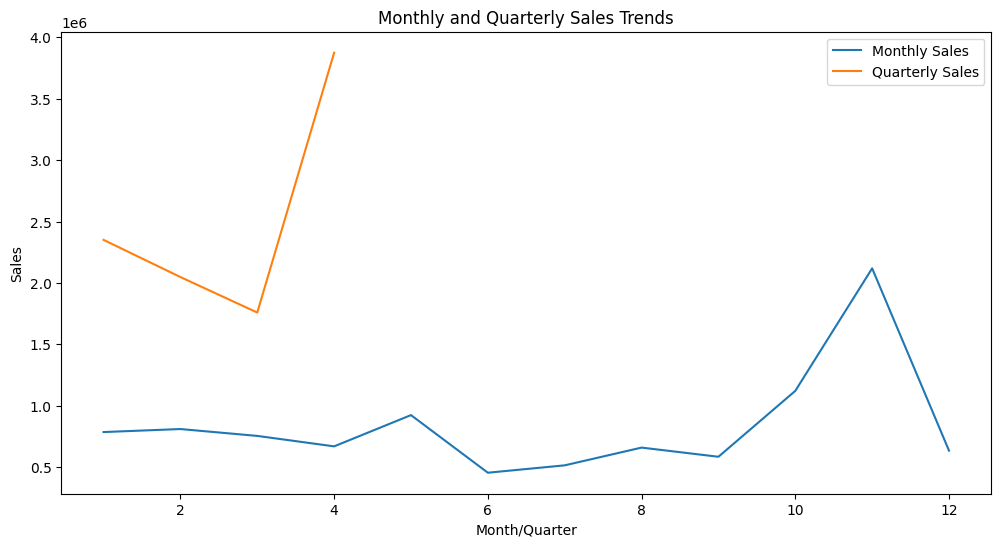

In [ ]:
# Calculating monthly and quarterly sales
monthly_sales = sales.groupby('MONTH_ID')['SALES'].sum()
quarterly_sales = sales.groupby('QTR_ID')['SALES'].sum()


# Plotting monthly and quartely sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales')
plt.plot(quarterly_sales.index, quarterly_sales.values, label='Quarterly Sales')
plt.xlabel('Month/Quarter')
plt.ylabel('Sales')
plt.title('Monthly and Quarterly Sales Trends')
plt.legend()
plt.show()

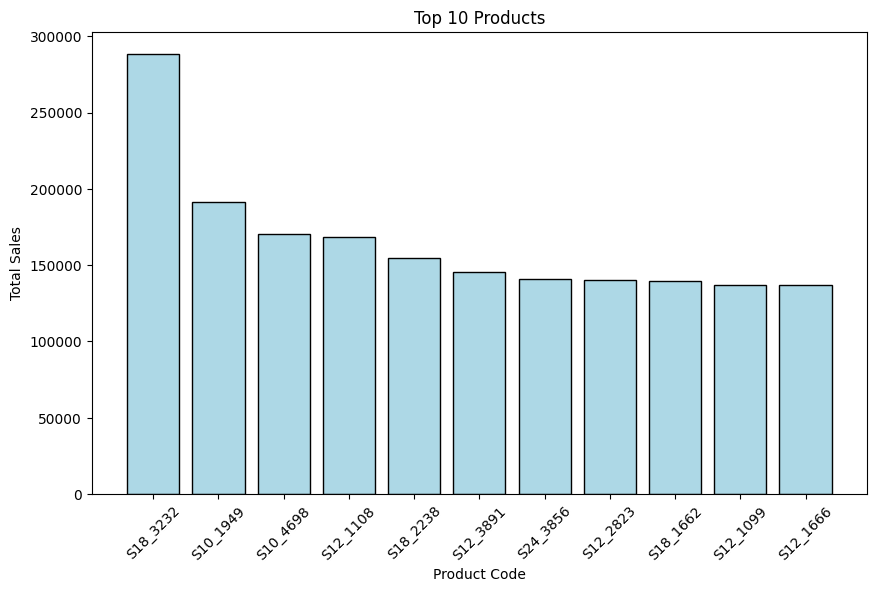

In [ ]:
# Plotting Top 10 Products
plt.figure(figsize=(10, 6))
plt.bar(top_selling_products['Product Code'], top_selling_products['Total Sales'], color ='lightblue', edgecolor = '0')
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.title("Top 10 Products")
plt.xticks(rotation=45)
plt.show()

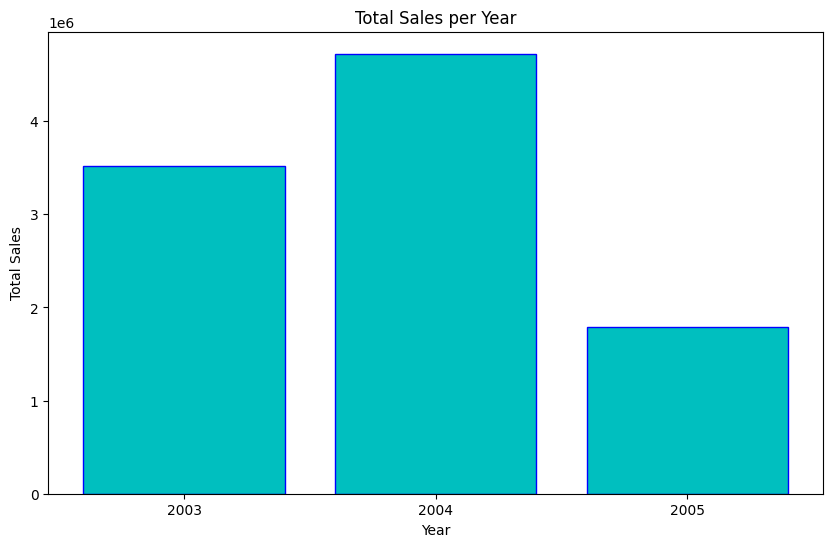

In [ ]:
# Grouping data by year and calculating total sales
year_sales = sales.groupby('YEAR_ID')['SALES'].sum()

# Plotting total sales per year
plt.figure(figsize=(10, 6))
plt.bar(year_sales.index, year_sales.values, color ='c', edgecolor ='b')
plt.xticks(year_sales.index)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales per Year')
plt.show()

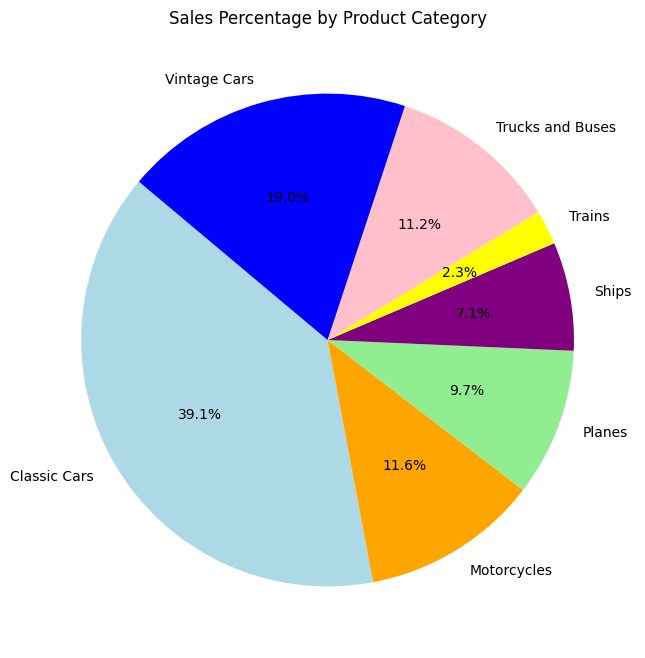

In [ ]:
# Grouping data by PRODUCTLINE and calculate total sales
category_sales = sales.groupby('PRODUCTLINE')['SALES'].sum()

# Calculating the percentage of total sales for each category
category_sales_percentage = (category_sales / category_sales.sum()) * 100

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales_percentage, labels=category_sales.index, autopct='%1.1f%%', startangle=140 ,colors=['lightblue', 'orange', 'lightgreen', 'purple', 'yellow', 'pink','blue'])
plt.title('Sales Percentage by Product Category')
plt.show()

<Figure size 1000x600 with 0 Axes>

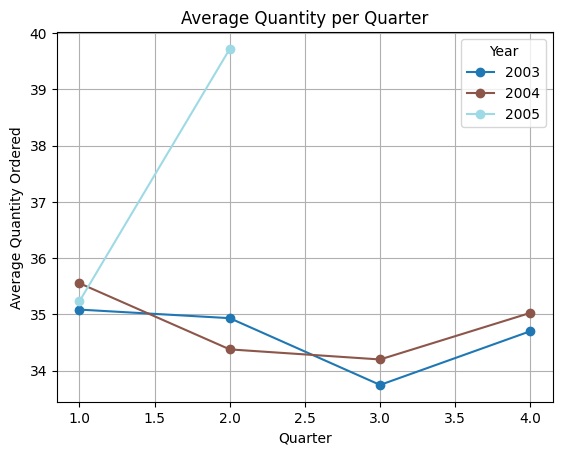

In [ ]:
# Grouping data by quarter and year and calculating average quantity ordered
avg_quantity_per_quarter = sales.groupby(['QTR_ID', 'YEAR_ID'])['QUANTITYORDERED'].mean().unstack()

# Calculating overall average quantity
overall_avg_quantity = avg_quantity_per_quarter.mean(axis=0)

# Plotting the average quantity per quarter using a line chart
plt.figure(figsize=(10, 6))
avg_quantity_per_quarter.plot(kind='line', marker='o', colormap='tab20', linestyle='-')
plt.xlabel('Quarter')
plt.ylabel('Average Quantity Ordered')
plt.title('Average Quantity per Quarter')
plt.legend(title='Year')
plt.grid(True)
plt.show()

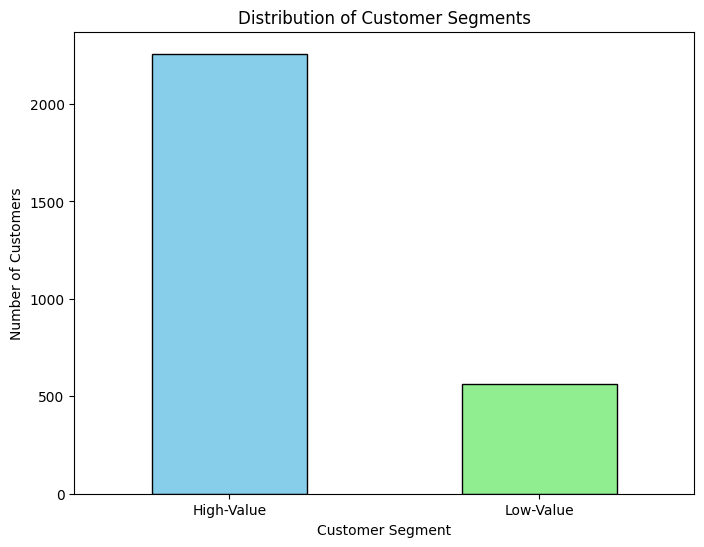

In [ ]:
# Count customers in each segment
segment_counts = sales['Customer_Segment'].value_counts()

# Plot the distribution using a bar chart
plt.figure(figsize=(8,6))
segment_counts.plot(kind='bar', color=['skyblue','lightgreen'], edgecolor='0')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments')
plt.xticks(rotation=0)
plt.show()

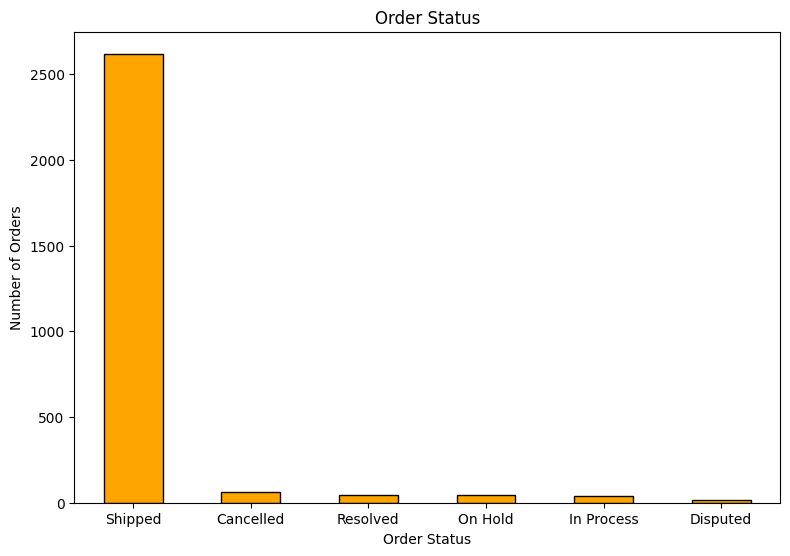

In [ ]:
# Count the number of orders in each status
status_counts = sales['STATUS'].value_counts()

# Plot the distribution using a bar chart
plt.figure(figsize=(8,6))
status_counts.plot(kind='bar', color='orange', edgecolor='0')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.title('Order Status')
plt.xticks(rotation=0)
plt.show()


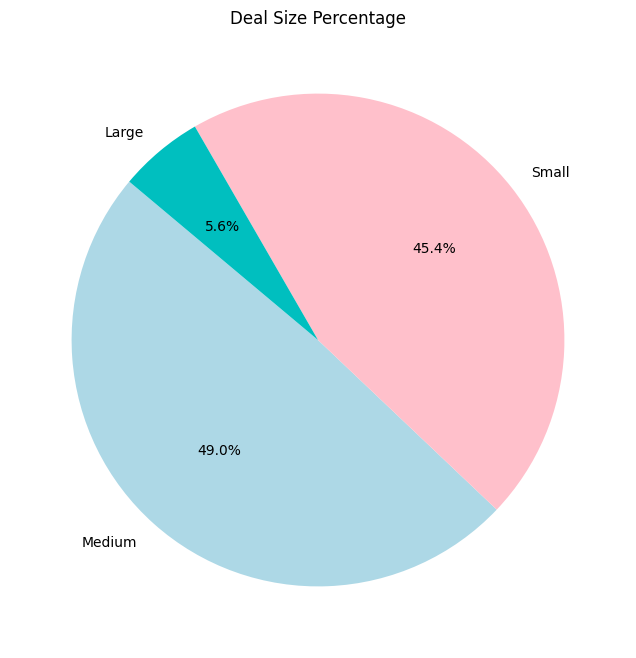

In [ ]:
# Count the number of orders in each deal size
deal_size_counts = sales['DEALSIZE'].value_counts()

# calculating the percentage of each order from the total number of orders
deal_size_percentage = (deal_size_counts / deal_size_counts.sum()) * 100

# plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(deal_size_percentage, labels=deal_size_counts.index, autopct='%1.1f%%', startangle=140 , colors=['lightblue', 'pink', 'c'])
plt.title('Deal Size Percentage')
plt.show()


Exporting a csv file

In [ ]:
prepared_dataset = sales.to_csv('/content/drive/My Drive/latest_dataset.csv', index=False)